# <font color=blue>Assignments for "Data Cleaning - Outliers"</font>

In this assignment, you continue to study the data of the `US Education System`. Again, please down it from here ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

**(1)** See `TOTAL_REVENUE`, which includes total revenue data, and `TOTAL_EXPENDITURE`, which includes total spending data. Do these variables contain outliers?

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

states = pd.read_csv(r"C:\Users\Kleerys\Desktop\Career\1.1-Python\1.1-DataSets\states_all.csv")

In [ ]:
display(states.head())

***Before looking if there any outlier, let's check haw many missing values we have.***

In [ ]:
print("NULL VALUES")
print("*****")
print(states.isnull().sum(axis = 0))

***We have some missing values. First, we should deal with them.***

In [ ]:
#Checking how releated features witch each another one.
plt.figure(figsize = (15,10))
sns.heatmap(states.corr(), cmap = "Blues", mask = np.triu(np.ones_like(states.corr(), dtype=np.bool)), annot = True)

***As we can see above, some features are not that releated with any other features. So we can remove those indices from our dataset.***

In [ ]:
states.drop(states[states["AVG_MATH_4_SCORE"].isnull()].index, inplace = True)
states.reset_index(drop = True, inplace = True)
states.drop(states[states["AVG_MATH_8_SCORE"].isnull()].index, inplace = True)
states.reset_index(drop = True, inplace = True)
states.drop(states[states["AVG_READING_4_SCORE"].isnull()].index, inplace = True)
states.reset_index(drop = True, inplace = True)
states.drop(states[states["AVG_READING_8_SCORE"].isnull()].index, inplace = True)
states.reset_index(drop = True, inplace = True)

In [6]:
print("NULL VALUES")
print("*****")
print(states.isnull().sum())

NULL VALUES
*****
PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          121
TOTAL_REVENUE                   121
FEDERAL_REVENUE                 121
STATE_REVENUE                   121
LOCAL_REVENUE                   121
TOTAL_EXPENDITURE               121
INSTRUCTION_EXPENDITURE         121
SUPPORT_SERVICES_EXPENDITURE    121
OTHER_EXPENDITURE               121
CAPITAL_OUTLAY_EXPENDITURE      121
GRADES_PK_G                      72
GRADES_KG_G                      70
GRADES_4_G                       70
GRADES_8_G                       70
GRADES_12_G                      70
GRADES_1_8_G                    121
GRADES_9_12_G                    70
GRADES_ALL_G                     70
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE               0
dtype: int64


In [7]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   478 non-null    object 
 1   STATE                         478 non-null    object 
 2   YEAR                          478 non-null    int64  
 3   ENROLL                        357 non-null    float64
 4   TOTAL_REVENUE                 357 non-null    float64
 5   FEDERAL_REVENUE               357 non-null    float64
 6   STATE_REVENUE                 357 non-null    float64
 7   LOCAL_REVENUE                 357 non-null    float64
 8   TOTAL_EXPENDITURE             357 non-null    float64
 9   INSTRUCTION_EXPENDITURE       357 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  357 non-null    float64
 11  OTHER_EXPENDITURE             357 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    357 non-null    float64
 13  GRADE

***Now we should fill other missing values. I think grouping features by the states and filling missing values by their features means should
<Br>
be enough for float variables.***

In [8]:
group = states[[col for col in states.columns if type(col) != object]].groupby(by = "STATE").mean()
display(group)

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
STATE,,,,,,,,,,,,,,,,,,,,,
ALABAMA,2011.0,7.389483e+05,6.753691e+06,7.622203e+05,3.770103e+06,2.221367e+06,6.945261e+06,3.538555e+06,2.114178e+06,5.320747e+05,...,57138.500,57857.625,47726.500,4.623303e+05,216580.750,742730.875,229.111111,266.777778,214.555556,255.222222
ALASKA,2011.0,1.316934e+05,2.115601e+06,3.203439e+05,1.321768e+06,4.734891e+05,2.253621e+06,1.096368e+06,7.873763e+05,7.199900e+04,...,9872.625,9949.250,9631.375,7.937571e+04,39933.625,132171.375,234.777778,280.000000,209.888889,258.333333
ARIZONA,2011.0,9.399199e+05,8.061567e+06,1.022020e+06,3.351951e+06,3.687596e+06,7.964372e+06,3.736732e+06,2.618340e+06,3.873931e+05,...,83095.125,81991.500,79775.875,6.610877e+05,326319.375,1084306.875,234.000000,278.000000,211.888889,258.666667
ARKANSAS,2011.0,4.705327e+05,4.563024e+06,5.465274e+05,3.409004e+06,6.074930e+05,4.755054e+06,2.338324e+06,1.448595e+06,3.719746e+05,...,36110.750,36556.750,30879.375,2.905694e+05,138619.500,481201.750,235.666667,274.222222,216.555556,259.000000
CALIFORNIA,2011.0,6.242039e+06,6.950477e+07,7.896131e+06,3.802889e+07,2.357975e+07,7.026832e+07,3.404387e+07,2.025557e+07,3.436768e+06,...,473694.500,479096.250,467477.750,3.794202e+06,1953856.875,6323679.750,231.777778,272.555556,211.111111,255.888889
COLORADO,2011.0,8.109901e+05,8.061409e+06,6.205236e+05,3.450492e+06,3.990393e+06,8.232029e+06,3.930867e+06,2.633457e+06,3.163429e+05,...,63078.250,61892.250,59033.125,4.981537e+05,244069.375,839051.250,241.444444,286.222222,224.666667,268.000000
CONNECTICUT,2011.0,5.346811e+05,9.236481e+06,4.595573e+05,3.383320e+06,5.393604e+06,8.850435e+06,4.928101e+06,2.643630e+06,3.184170e+05,...,41033.250,42725.500,40052.750,3.342989e+05,171031.875,557089.250,242.000000,284.666667,227.555556,270.555556
DELAWARE,2011.0,1.165334e+05,1.684968e+06,1.273024e+05,1.012117e+06,5.455494e+05,1.715668e+06,8.865887e+05,4.874091e+05,8.209700e+04,...,9735.125,10034.625,8229.125,7.809357e+04,38158.375,127469.125,239.333333,280.555556,223.888889,264.333333
DISTRICT_OF_COLUMBIA,2011.0,5.223357e+04,1.162632e+06,1.375460e+05,0.000000e+00,1.025086e+06,1.157721e+06,4.853767e+05,3.952020e+05,4.112557e+04,...,5266.500,4717.250,3492.250,4.133357e+04,18308.875,78273.875,221.888889,257.000000,202.666667,243.888889


In [9]:
states.sort_values(by = "STATE", inplace = True)
states.reset_index(drop = True, inplace = True)
display(states)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
1,2019_ALABAMA,ALABAMA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,230.0,269.0,212.0,253.0
2,2009_ALABAMA,ALABAMA,2009,745668.0,7186390.0,728795.0,4161103.0,2296492.0,7815467.0,3836398.0,...,59512.0,57027.0,48164.0,464601.0,219495.0,748889.0,228.0,269.0,216.0,255.0
3,2011_ALABAMA,ALABAMA,2011,746933.0,7376725.0,1077070.0,3965614.0,2334041.0,7411768.0,3844055.0,...,56491.0,57919.0,49510.0,461122.0,217615.0,744621.0,231.0,269.0,220.0,258.0
4,2007_ALABAMA,ALABAMA,2007,743273.0,7069040.0,689072.0,4070949.0,2309019.0,7196459.0,3653466.0,...,57795.0,58792.0,46200.0,466414.0,216941.0,742919.0,229.0,266.0,216.0,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,2017_WYOMING,WYOMING,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7537.0,7086.0,6405.0,NaN,27361.0,94258.0,248.0,289.0,227.0,269.0
474,2007_WYOMING,WYOMING,2007,85034.0,1477891.0,111051.0,722364.0,644476.0,1390344.0,661713.0,...,6493.0,6711.0,6246.0,51939.0,27179.0,86422.0,244.0,287.0,225.0,266.0
475,2005_WYOMING,WYOMING,2005,84146.0,1132160.0,106484.0,585789.0,439887.0,1033603.0,510498.0,...,6111.0,6819.0,6079.0,50375.0,27214.0,84409.0,243.0,282.0,223.0,268.0
476,2009_WYOMING,WYOMING,2009,86971.0,1675761.0,108333.0,945765.0,621663.0,1658156.0,744877.0,...,6683.0,6606.0,6160.0,53885.0,26330.0,88155.0,242.0,286.0,223.0,268.0


In [10]:
for col in states.columns:
    if col not in ["PRIMARY_KEY", "STATE", "YEAR"]:
        states[col] = states.groupby("STATE").transform(lambda x: x.fillna(x.mean()))[col]
display(states)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2003_ALABAMA,ALABAMA,2003,727900.000000,5.196054e+06,5.677040e+05,2.966981e+06,1.661369e+06,5.298932e+06,2.817111e+06,...,57323.000,59663.000,42005.000,466920.000000,205907.00,731220.000,223.0,262.0,207.0,253.0
1,2019_ALABAMA,ALABAMA,2019,738948.285714,6.753691e+06,7.622203e+05,3.770103e+06,2.221367e+06,6.945261e+06,3.538555e+06,...,57138.500,57857.625,47726.500,462330.285714,216580.75,742730.875,230.0,269.0,212.0,253.0
2,2009_ALABAMA,ALABAMA,2009,745668.000000,7.186390e+06,7.287950e+05,4.161103e+06,2.296492e+06,7.815467e+06,3.836398e+06,...,59512.000,57027.000,48164.000,464601.000000,219495.00,748889.000,228.0,269.0,216.0,255.0
3,2011_ALABAMA,ALABAMA,2011,746933.000000,7.376725e+06,1.077070e+06,3.965614e+06,2.334041e+06,7.411768e+06,3.844055e+06,...,56491.000,57919.000,49510.000,461122.000000,217615.00,744621.000,231.0,269.0,220.0,258.0
4,2007_ALABAMA,ALABAMA,2007,743273.000000,7.069040e+06,6.890720e+05,4.070949e+06,2.309019e+06,7.196459e+06,3.653466e+06,...,57795.000,58792.000,46200.000,466414.000000,216941.00,742919.000,229.0,266.0,216.0,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,2017_WYOMING,WYOMING,2017,87954.571429,1.508216e+06,1.141317e+05,8.028753e+05,5.912093e+05,1.467479e+06,7.084429e+05,...,7537.000,7086.000,6405.000,54328.142857,27361.00,94258.000,248.0,289.0,227.0,269.0
474,2007_WYOMING,WYOMING,2007,85034.000000,1.477891e+06,1.110510e+05,7.223640e+05,6.444760e+05,1.390344e+06,6.617130e+05,...,6493.000,6711.000,6246.000,51939.000000,27179.00,86422.000,244.0,287.0,225.0,266.0
475,2005_WYOMING,WYOMING,2005,84146.000000,1.132160e+06,1.064840e+05,5.857890e+05,4.398870e+05,1.033603e+06,5.104980e+05,...,6111.000,6819.000,6079.000,50375.000000,27214.00,84409.000,243.0,282.0,223.0,268.0
476,2009_WYOMING,WYOMING,2009,86971.000000,1.675761e+06,1.083330e+05,9.457650e+05,6.216630e+05,1.658156e+06,7.448770e+05,...,6683.000,6606.000,6160.000,53885.000000,26330.00,88155.000,242.0,286.0,223.0,268.0


In [11]:
print(states.isnull().sum())

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                          19
TOTAL_REVENUE                   19
FEDERAL_REVENUE                 19
STATE_REVENUE                   19
LOCAL_REVENUE                   19
TOTAL_EXPENDITURE               19
INSTRUCTION_EXPENDITURE         19
SUPPORT_SERVICES_EXPENDITURE    19
OTHER_EXPENDITURE               19
CAPITAL_OUTLAY_EXPENDITURE      19
GRADES_PK_G                     19
GRADES_KG_G                     19
GRADES_4_G                      19
GRADES_8_G                      19
GRADES_12_G                     19
GRADES_1_8_G                    19
GRADES_9_12_G                   19
GRADES_ALL_G                    19
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE              0
AVG_READING_8_SCORE              0
dtype: int64


***Now, we filled the missing values as many as we can. Now we can drop the rest.***

In [12]:
for col in states.columns:
    states.drop(states[states[col].isnull() == True].index, inplace = True)
    states.reset_index(drop = True, inplace = True)
display(states)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,2003_ALABAMA,ALABAMA,2003,727900.000000,5.196054e+06,5.677040e+05,2.966981e+06,1.661369e+06,5.298932e+06,2.817111e+06,...,57323.000,59663.000,42005.000,466920.000000,205907.00,731220.000,223.0,262.0,207.0,253.0
1,2019_ALABAMA,ALABAMA,2019,738948.285714,6.753691e+06,7.622203e+05,3.770103e+06,2.221367e+06,6.945261e+06,3.538555e+06,...,57138.500,57857.625,47726.500,462330.285714,216580.75,742730.875,230.0,269.0,212.0,253.0
2,2009_ALABAMA,ALABAMA,2009,745668.000000,7.186390e+06,7.287950e+05,4.161103e+06,2.296492e+06,7.815467e+06,3.836398e+06,...,59512.000,57027.000,48164.000,464601.000000,219495.00,748889.000,228.0,269.0,216.0,255.0
3,2011_ALABAMA,ALABAMA,2011,746933.000000,7.376725e+06,1.077070e+06,3.965614e+06,2.334041e+06,7.411768e+06,3.844055e+06,...,56491.000,57919.000,49510.000,461122.000000,217615.00,744621.000,231.0,269.0,220.0,258.0
4,2007_ALABAMA,ALABAMA,2007,743273.000000,7.069040e+06,6.890720e+05,4.070949e+06,2.309019e+06,7.196459e+06,3.653466e+06,...,57795.000,58792.000,46200.000,466414.000000,216941.00,742919.000,229.0,266.0,216.0,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,2017_WYOMING,WYOMING,2017,87954.571429,1.508216e+06,1.141317e+05,8.028753e+05,5.912093e+05,1.467479e+06,7.084429e+05,...,7537.000,7086.000,6405.000,54328.142857,27361.00,94258.000,248.0,289.0,227.0,269.0
455,2007_WYOMING,WYOMING,2007,85034.000000,1.477891e+06,1.110510e+05,7.223640e+05,6.444760e+05,1.390344e+06,6.617130e+05,...,6493.000,6711.000,6246.000,51939.000000,27179.00,86422.000,244.0,287.0,225.0,266.0
456,2005_WYOMING,WYOMING,2005,84146.000000,1.132160e+06,1.064840e+05,5.857890e+05,4.398870e+05,1.033603e+06,5.104980e+05,...,6111.000,6819.000,6079.000,50375.000000,27214.00,84409.000,243.0,282.0,223.0,268.0
457,2009_WYOMING,WYOMING,2009,86971.000000,1.675761e+06,1.083330e+05,9.457650e+05,6.216630e+05,1.658156e+06,7.448770e+05,...,6683.000,6606.000,6160.000,53885.000000,26330.00,88155.000,242.0,286.0,223.0,268.0


In [13]:
statesCopy = states
print(states.isnull().sum())

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64


***Now outliers...***

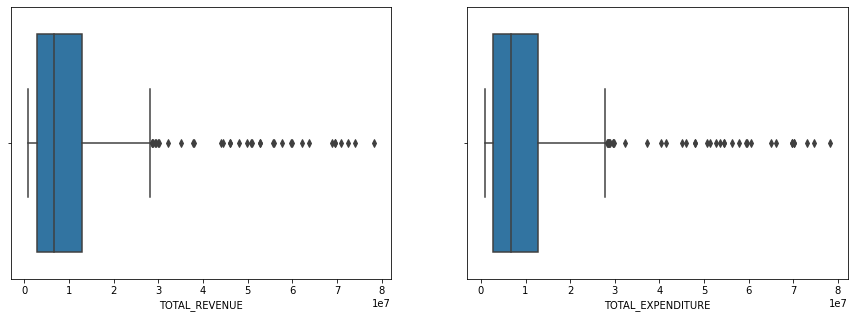

In [14]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(states.TOTAL_REVENUE)
plt.subplot(1, 2, 2)
sns.boxplot(states.TOTAL_EXPENDITURE)
plt.show()

***As wecan see above, we can say that these features have outliers. It might seem the values out of the whiskers are too many and close to each other but some values loacated too far from center and are few. Now let's look at zscore for some threshold values and plot them.***

In [15]:
import scipy as sci

def zs (feature):
    print("*****")
    z = sci.stats.mstats.zscore(feature)
    for threshold in range(1, 10, 1):
        print("-----")
        print("Threshold value: {}".format(threshold))
        print("Number of outliers: {}".format(len(np.where(z > threshold)[0])))
    return

print("TOTAL REVENUE")
zs(states.TOTAL_REVENUE)
print("TOTAL EXPENDITURE")
zs(states.TOTAL_EXPENDITURE)

TOTAL REVENUE
*****
-----
Threshold value: 1
Number of outliers: 53
-----
Threshold value: 2
Number of outliers: 24
-----
Threshold value: 3
Number of outliers: 16
-----
Threshold value: 4
Number of outliers: 7
-----
Threshold value: 5
Number of outliers: 0
-----
Threshold value: 6
Number of outliers: 0
-----
Threshold value: 7
Number of outliers: 0
-----
Threshold value: 8
Number of outliers: 0
-----
Threshold value: 9
Number of outliers: 0
TOTAL EXPENDITURE
*****
-----
Threshold value: 1
Number of outliers: 54
-----
Threshold value: 2
Number of outliers: 26
-----
Threshold value: 3
Number of outliers: 17
-----
Threshold value: 4
Number of outliers: 7
-----
Threshold value: 5
Number of outliers: 0
-----
Threshold value: 6
Number of outliers: 0
-----
Threshold value: 7
Number of outliers: 0
-----
Threshold value: 8
Number of outliers: 0
-----
Threshold value: 9
Number of outliers: 0


**(2)** If you find outliers in the total income `TOTAL_REVENUE` and total expenditure `TOTAL_EXPENDITURE` variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

***Z - Score = (X – mean) / std***

In [16]:
limit = (4 * np.std(states.TOTAL_REVENUE)) + np.mean(states.TOTAL_REVENUE)
states.drop(states[states.TOTAL_REVENUE > limit].index, inplace = True)
states.reset_index(drop = True, inplace = True)
zs(states.TOTAL_REVENUE)
limit = (4 * np.std(states.TOTAL_EXPENDITURE)) + np.mean(states.TOTAL_EXPENDITURE)
states.drop(states[states.TOTAL_EXPENDITURE > limit].index, inplace = True)
states.reset_index(drop = True, inplace = True)
zs(states.TOTAL_EXPENDITURE)

*****
-----
Threshold value: 1
Number of outliers: 59
-----
Threshold value: 2
Number of outliers: 20
-----
Threshold value: 3
Number of outliers: 16
-----
Threshold value: 4
Number of outliers: 7
-----
Threshold value: 5
Number of outliers: 0
-----
Threshold value: 6
Number of outliers: 0
-----
Threshold value: 7
Number of outliers: 0
-----
Threshold value: 8
Number of outliers: 0
-----
Threshold value: 9
Number of outliers: 0
*****
-----
Threshold value: 1
Number of outliers: 61
-----
Threshold value: 2
Number of outliers: 16
-----
Threshold value: 3
Number of outliers: 13
-----
Threshold value: 4
Number of outliers: 7
-----
Threshold value: 5
Number of outliers: 0
-----
Threshold value: 6
Number of outliers: 0
-----
Threshold value: 7
Number of outliers: 0
-----
Threshold value: 8
Number of outliers: 0
-----
Threshold value: 9
Number of outliers: 0


***We remove the outliers that exceeds a certain threshold value.***

**(3)** Subtract the total expenditure `TOTAL_EXPENDITURE` from the total income variable `TOTAL_REVENUE` to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

In [17]:
states["BUDGET_DEFICIT"] = states.TOTAL_REVENUE - states.TOTAL_EXPENDITURE

In [18]:
display(states)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,BUDGET_DEFICIT
0,2003_ALABAMA,ALABAMA,2003,727900.000000,5.196054e+06,5.677040e+05,2.966981e+06,1.661369e+06,5.298932e+06,2.817111e+06,...,59663.000,42005.000,466920.000000,205907.00,731220.000,223.0,262.0,207.0,253.0,-102878.000000
1,2019_ALABAMA,ALABAMA,2019,738948.285714,6.753691e+06,7.622203e+05,3.770103e+06,2.221367e+06,6.945261e+06,3.538555e+06,...,57857.625,47726.500,462330.285714,216580.75,742730.875,230.0,269.0,212.0,253.0,-191570.571429
2,2009_ALABAMA,ALABAMA,2009,745668.000000,7.186390e+06,7.287950e+05,4.161103e+06,2.296492e+06,7.815467e+06,3.836398e+06,...,57027.000,48164.000,464601.000000,219495.00,748889.000,228.0,269.0,216.0,255.0,-629077.000000
3,2011_ALABAMA,ALABAMA,2011,746933.000000,7.376725e+06,1.077070e+06,3.965614e+06,2.334041e+06,7.411768e+06,3.844055e+06,...,57919.000,49510.000,461122.000000,217615.00,744621.000,231.0,269.0,220.0,258.0,-35043.000000
4,2007_ALABAMA,ALABAMA,2007,743273.000000,7.069040e+06,6.890720e+05,4.070949e+06,2.309019e+06,7.196459e+06,3.653466e+06,...,58792.000,46200.000,466414.000000,216941.00,742919.000,229.0,266.0,216.0,252.0,-127419.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2017_WYOMING,WYOMING,2017,87954.571429,1.508216e+06,1.141317e+05,8.028753e+05,5.912093e+05,1.467479e+06,7.084429e+05,...,7086.000,6405.000,54328.142857,27361.00,94258.000,248.0,289.0,227.0,269.0,40737.571429
442,2007_WYOMING,WYOMING,2007,85034.000000,1.477891e+06,1.110510e+05,7.223640e+05,6.444760e+05,1.390344e+06,6.617130e+05,...,6711.000,6246.000,51939.000000,27179.00,86422.000,244.0,287.0,225.0,266.0,87547.000000
443,2005_WYOMING,WYOMING,2005,84146.000000,1.132160e+06,1.064840e+05,5.857890e+05,4.398870e+05,1.033603e+06,5.104980e+05,...,6819.000,6079.000,50375.000000,27214.00,84409.000,243.0,282.0,223.0,268.0,98557.000000
444,2009_WYOMING,WYOMING,2009,86971.000000,1.675761e+06,1.083330e+05,9.457650e+05,6.216630e+05,1.658156e+06,7.448770e+05,...,6606.000,6160.000,53885.000000,26330.00,88155.000,242.0,286.0,223.0,268.0,17605.000000


In [19]:
zs(states.BUDGET_DEFICIT)
limit = (4 * np.std(states.BUDGET_DEFICIT)) + np.mean(states.BUDGET_DEFICIT)
states.drop(states[states.BUDGET_DEFICIT > limit].index, inplace = True)
states.reset_index(drop = True, inplace = True)
zs(states.BUDGET_DEFICIT)

*****
-----
Threshold value: 1
Number of outliers: 29
-----
Threshold value: 2
Number of outliers: 6
-----
Threshold value: 3
Number of outliers: 2
-----
Threshold value: 4
Number of outliers: 0
-----
Threshold value: 5
Number of outliers: 0
-----
Threshold value: 6
Number of outliers: 0
-----
Threshold value: 7
Number of outliers: 0
-----
Threshold value: 8
Number of outliers: 0
-----
Threshold value: 9
Number of outliers: 0
*****
-----
Threshold value: 1
Number of outliers: 29
-----
Threshold value: 2
Number of outliers: 6
-----
Threshold value: 3
Number of outliers: 2
-----
Threshold value: 4
Number of outliers: 0
-----
Threshold value: 5
Number of outliers: 0
-----
Threshold value: 6
Number of outliers: 0
-----
Threshold value: 7
Number of outliers: 0
-----
Threshold value: 8
Number of outliers: 0
-----
Threshold value: 9
Number of outliers: 0


**(4)** Again create a variable that can be considered as a budget deficit by subtracting the total income `TOTAL_REVENUE` variable from the total expenditure `TOTAL_EXPENDITURE`. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

***I have already done this task above. So i will do 3rd question in down below.***

In [20]:
statesCopy["BUDGET_DEFICIT"] = statesCopy.TOTAL_REVENUE - statesCopy.TOTAL_EXPENDITURE
zs(statesCopy.BUDGET_DEFICIT)

*****
-----
Threshold value: 1
Number of outliers: 29
-----
Threshold value: 2
Number of outliers: 6
-----
Threshold value: 3
Number of outliers: 2
-----
Threshold value: 4
Number of outliers: 0
-----
Threshold value: 5
Number of outliers: 0
-----
Threshold value: 6
Number of outliers: 0
-----
Threshold value: 7
Number of outliers: 0
-----
Threshold value: 8
Number of outliers: 0
-----
Threshold value: 9
Number of outliers: 0


**(5)** Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

***Yes. Suprisingly, when we clear outliers before creating budget deficit feature, reveals new outliers in this features but when we do opposite we obsereve no outliers in it. O.o***

**(6)** If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

***Actually, in that situation i would do the same but i keep the outliers in somewhere else instead of just dropping them.***